In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

<ipython-input-5-63b2ae57e52f>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq("SELECT * FROM transformed.base_entity")


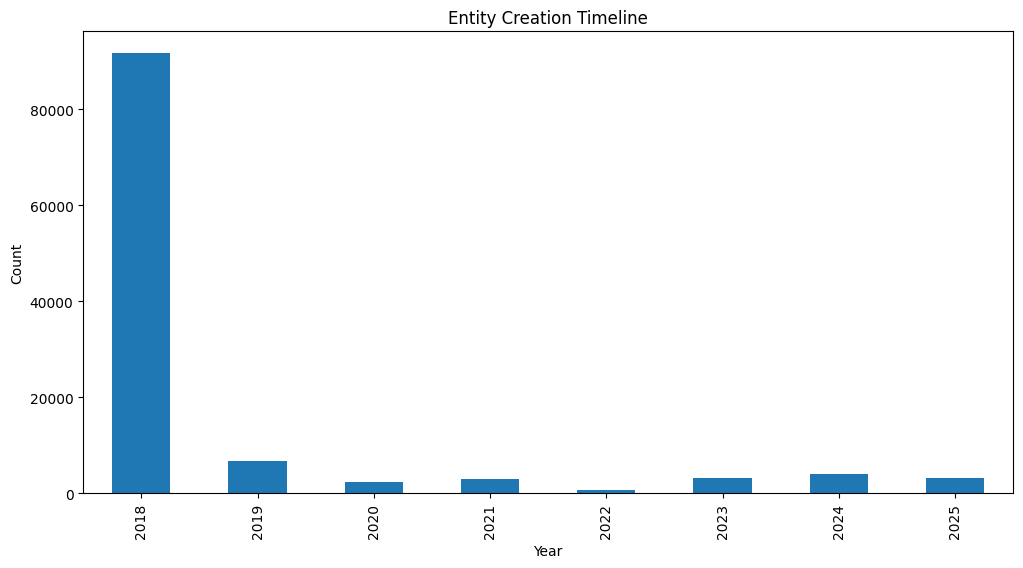

In [5]:
df = pd.read_gbq("SELECT * FROM transformed.base_entity")

# Temporal analysis
df['created_date'] = pd.to_datetime(df['created_date'])

plt.figure(figsize=(12,6))
df['created_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Entity Creation Timeline')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<ipython-input-32-aa1290e962c4>:4: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq("SELECT type_value FROM transformed.entity_types")


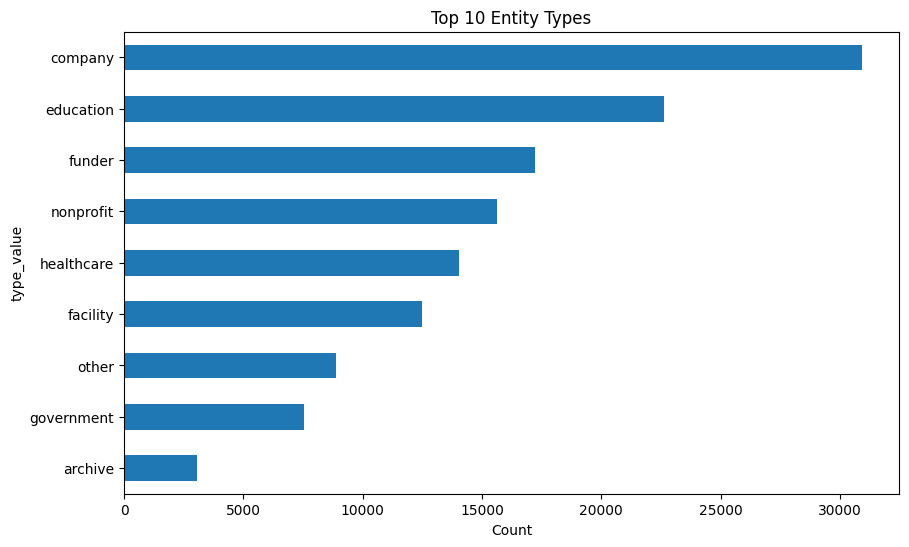

In [ ]:
# Categorial Analysis
df = pd.read_gbq("SELECT type_value FROM transformed.entity_types")

# Create count plot
plt.figure(figsize=(10,6))
df['type_value'].value_counts().sort_values().plot(kind='barh')

plt.title('Top 10 Entity Types')
plt.xlabel('Count')
plt.show()


<ipython-input-34-dcb26078ab3c>:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq("SELECT * FROM transformed.locations")


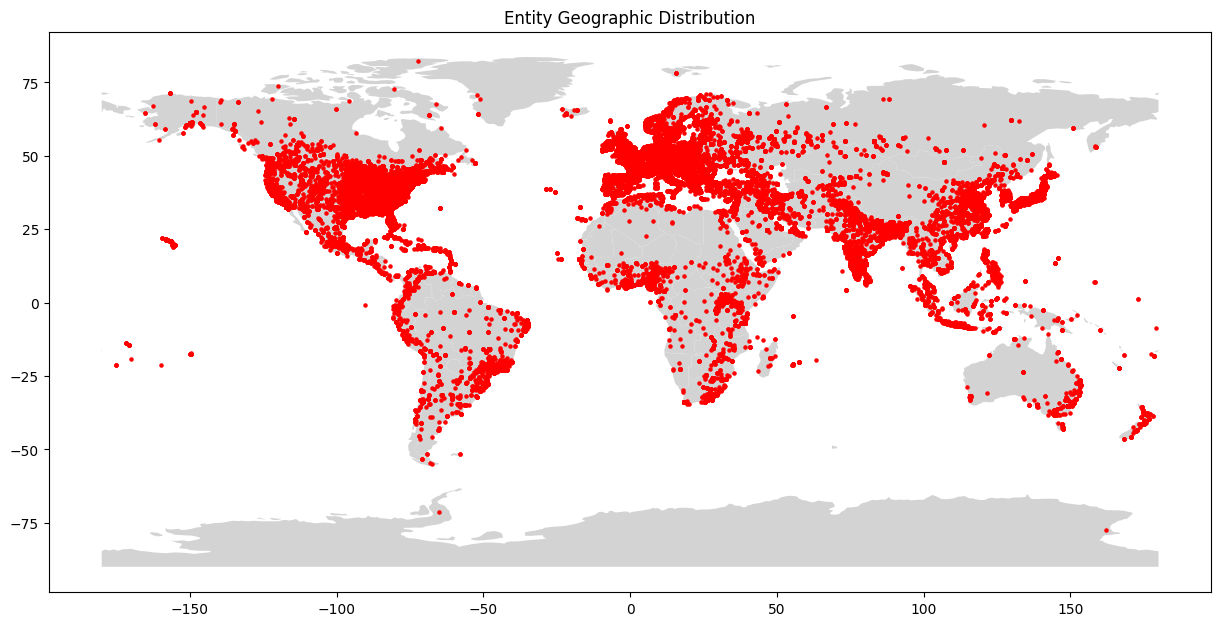

In [ ]:
#Geospatial Analysis
import geopandas as gpd
from shapely.geometry import Point

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

df = pd.read_gbq("SELECT * FROM transformed.locations")

# Extract locations
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot world map
world = gpd.read_file(url)
ax = world.plot(figsize=(15,10), color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='red')
plt.title('Entity Geographic Distribution')
plt.show()


In [ ]:
import plotly.express as px

# Prepare data
scatter_df = pd.read_gbq("select base.id, established, loc.num_loc, typ.num_type, status from `transformed.base_entity` base left join (select entity_id, count(1) num_loc from `transformed.locations` group by all) loc on base.id = loc.entity_id left join (select entity_id, count(1) num_type from `transformed.entity_types` group by all) typ on base.id = typ.entity_id")

# Interactive 3D plot
fig = px.scatter_3d(scatter_df, x='established', y='num_loc', z='num_type',
                   color='status', size='num_loc', hover_name=scatter_df['id'])
fig.show()


<ipython-input-44-e8f48e8b2df1>:4: FutureWarning:

read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq

